In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)

import warnings
warnings.simplefilter(action = 'ignore')

### Deliverable -1 (Exploratory data quality report reflecting univariate & bivariate analysis)

In [2]:
raw_df = pd.read_csv('D:\Joydeep\AI-ML\GL\Week 7 - Featurization, Tuning, Model Selection\Assignment\concrete.csv')
raw_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
raw_df.shape

(1030, 9)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
# Null values identification
raw_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
raw_df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

cement          True
slag            True
ash             True
water           True
superplastic    True
coarseagg       True
fineagg         True
age             True
strength        True
dtype: bool

#### No apparent null or non numeric values

In [7]:
# Checking for duplicates
raw_df.duplicated().sum()

25

In [8]:
# Dropping duplicates
raw_df.drop_duplicates(keep = 'first', inplace = True)
print(raw_df.duplicated().sum())
print(raw_df.shape)

0
(1005, 9)


#### Duplicate rows dropped

In [9]:
import scipy.stats as stats

profile = round(raw_df.describe(),2)


for i in raw_df.columns:
    profile.loc['Range',i] = raw_df[i].max() - raw_df[i].min()
    profile.loc['IQR',i] = stats.iqr(raw_df[i])
    
for i in raw_df.columns:
    IQR = stats.iqr(raw_df[i])
    profile.loc['Outliers',i] = len(raw_df[raw_df[i] > (1.5*IQR + raw_df[i].quantile(q = 0.75))].index) + len(raw_df[raw_df[i] < (raw_df[i].quantile(q = 0.25) - 1.5*IQR)].index)

    
profile.loc['Kurtosis'] = round(raw_df.kurtosis(),2).tolist()
profile.loc['Skew'] = round(raw_df.skew(),2).tolist()

profile.transpose()


,count,mean,std,min,25%,50%,75%,max,Range,IQR,Outliers,Kurtosis,Skew
cement,1005.0,278.63,104.34,102.00,190.70,265.0,349.00,540.0,438.00,158.30,0.0,-0.43,0.56
slag,1005.0,72.04,86.17,0.00,0.00,20.0,142.50,359.4,359.40,142.50,2.0,-0.41,0.86
ash,1005.0,55.54,64.21,0.00,0.00,0.0,118.30,200.1,200.10,118.30,0.0,-1.37,0.50
water,1005.0,182.08,21.34,121.80,166.60,185.7,192.90,247.0,125.20,26.30,15.0,0.17,0.03
superplastic,1005.0,6.03,5.92,0.00,0.00,6.1,10.00,32.2,32.20,10.00,10.0,1.70,0.98
coarseagg,1005.0,974.38,77.58,801.00,932.00,968.0,1031.00,1145.0,344.00,99.00,0.0,-0.58,-0.07
fineagg,1005.0,772.69,80.34,594.00,724.30,780.0,822.20,992.6,398.60,97.90,5.0,-0.11,-0.25
age,1005.0,45.86,63.73,1.00,7.00,28.0,56.00,365.0,364.00,49.00,59.0,11.96,3.25
strength,1005.0,35.25,16.28,2.33,23.52,33.8,44.87,82.6,80.27,21.35,8.0,-0.31,0.40


#### Inferences

1. Slag and ash, age has wide difference in mean and median values,indicating right tailed skewness in data.
2. Slag, ash & superplastic have 0 as min value, 25% quartile & 50% quartile for ash - There might be data capture issues with these parameters
3. Outliers have to be managed for slag, water, superplastic, fineagg & age

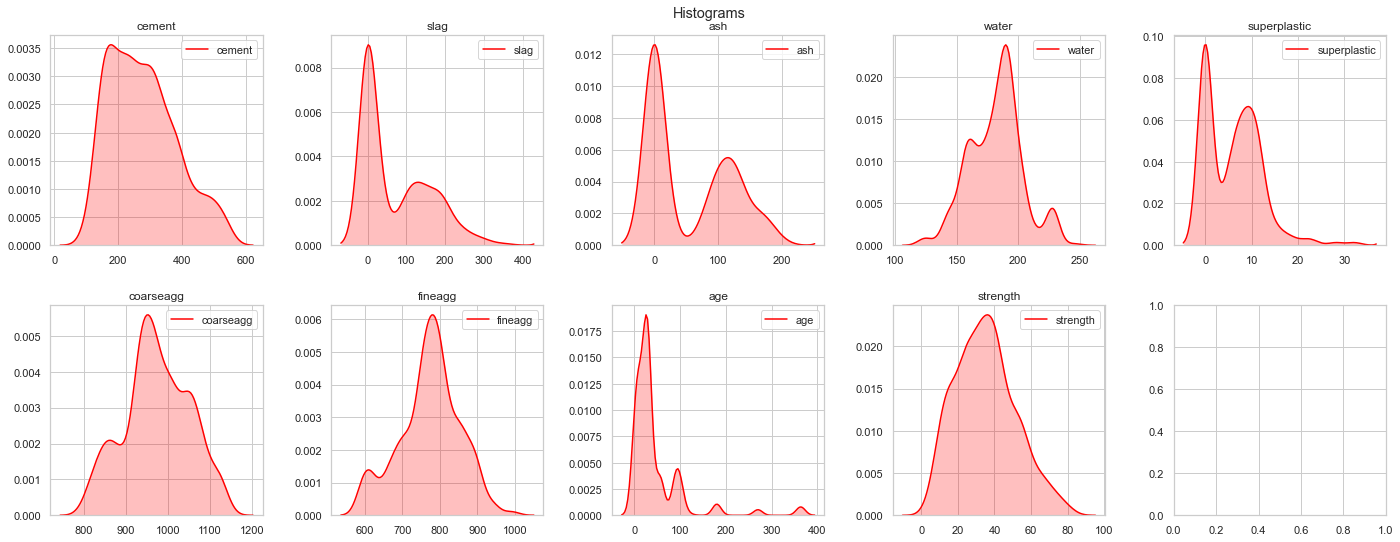

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, gridspec_kw={'width_ratios':[1,1,1,1,1]}, figsize=(20,8), sharey = False, sharex = False)
fig.suptitle('Histograms')
fig.tight_layout(pad=3.0)

k = 0

for i in raw_df.columns:
    r = k//5
    c = k%5
    ax[r,c].set_title(i, fontsize = 12)
    sns.kdeplot(raw_df[i], color = 'Red', shade = True, ax = ax[r,c])
    k = k+1

#### Inferences

1. Cement & Strength are almost normally distributed with a slight left skewness
2. Slag, Ash & Superplastic have 2 gaussians and have right tails - This is because of the 0 values in these parameters
3. Water, coarseagg & Age have multiple gaussians
4. Fineagg is also almost normally distributed, but has a small second gaussian on the left and is left skewed

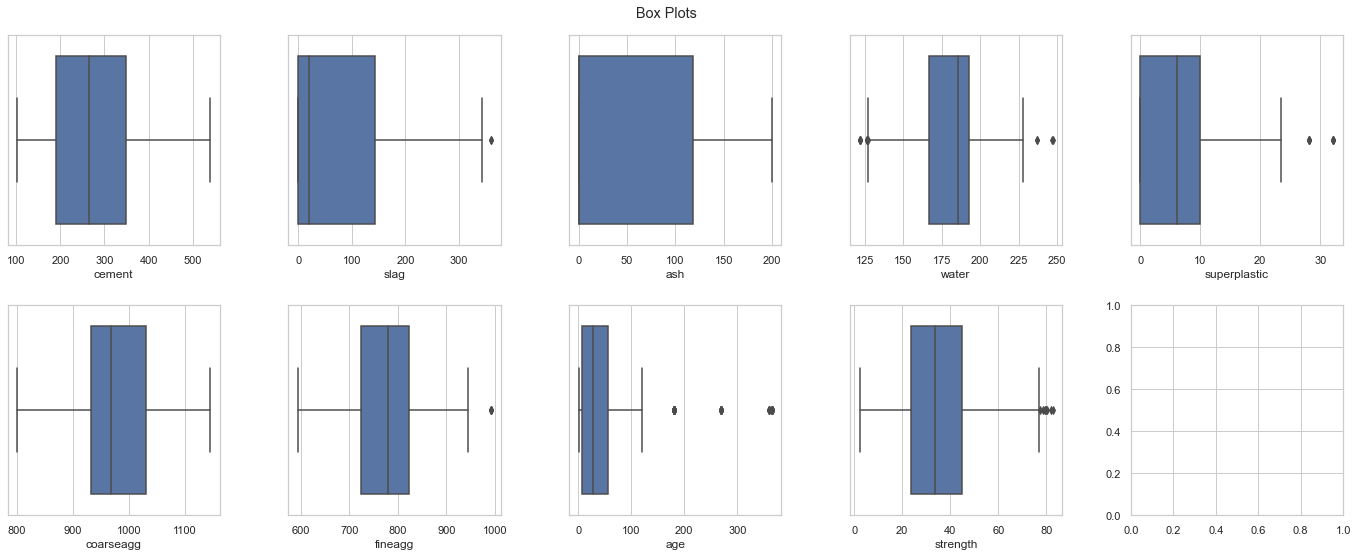

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, gridspec_kw={'width_ratios':[1,1,1,1,1]}, figsize=(20,8))
fig.suptitle('Box Plots')
fig.tight_layout(pad=3.0)

k = 0

for i in raw_df.columns:
    r = k//5
    c = k%5
    sns.boxplot(x=raw_df[i], orient = 'h', ax = ax[r,c])
    k = k+1

#### Outliers are present in the slag, water, superplastic, fineagg & age

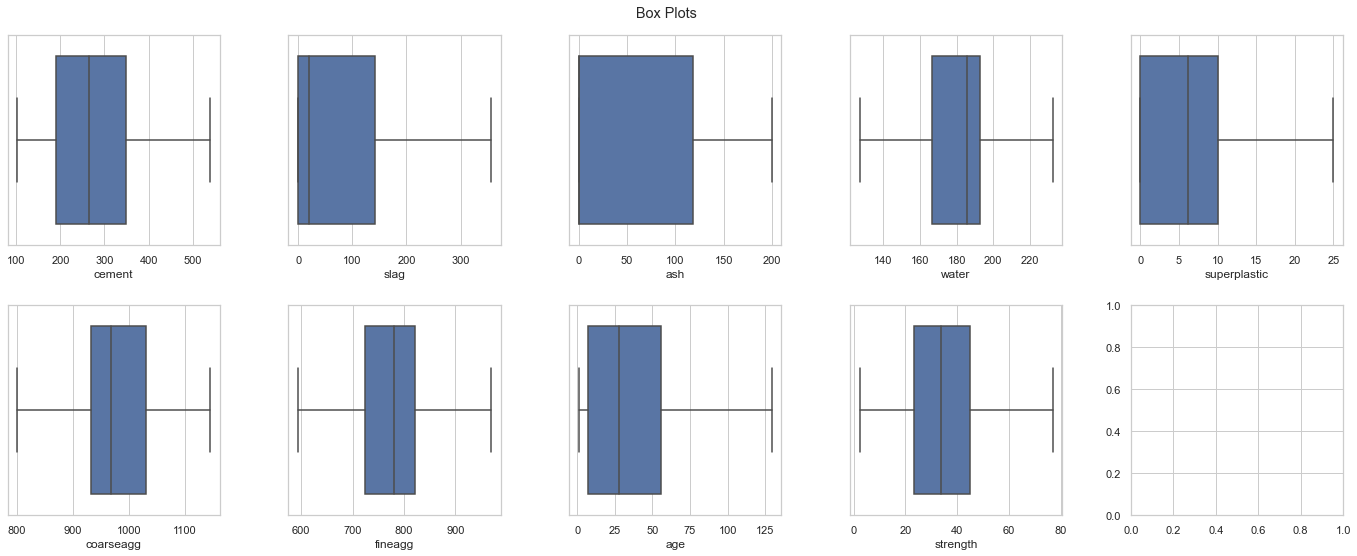

In [12]:
#Replacing outliers with edge values

mod_df = raw_df

for i in mod_df.columns:
    IQR = stats.iqr(raw_df[i])
    upper = 1.5*IQR + raw_df[i].quantile(q = 0.75)
    lower = raw_df[i].quantile(q = 0.25) - 1.5*IQR
    mod_df[i].loc[mod_df[i] > upper] = upper
    mod_df[i].loc[mod_df[i] < lower] = lower
    
fig, ax = plt.subplots(nrows = 2, ncols = 5, gridspec_kw={'width_ratios':[1,1,1,1,1]}, figsize=(20,8))
fig.suptitle('Box Plots')
fig.tight_layout(pad=3.0)

k = 0

for i in mod_df.columns:
    r = k//5
    c = k%5
    sns.boxplot(x=mod_df[i], orient = 'h', ax = ax[r,c])
    k = k+1

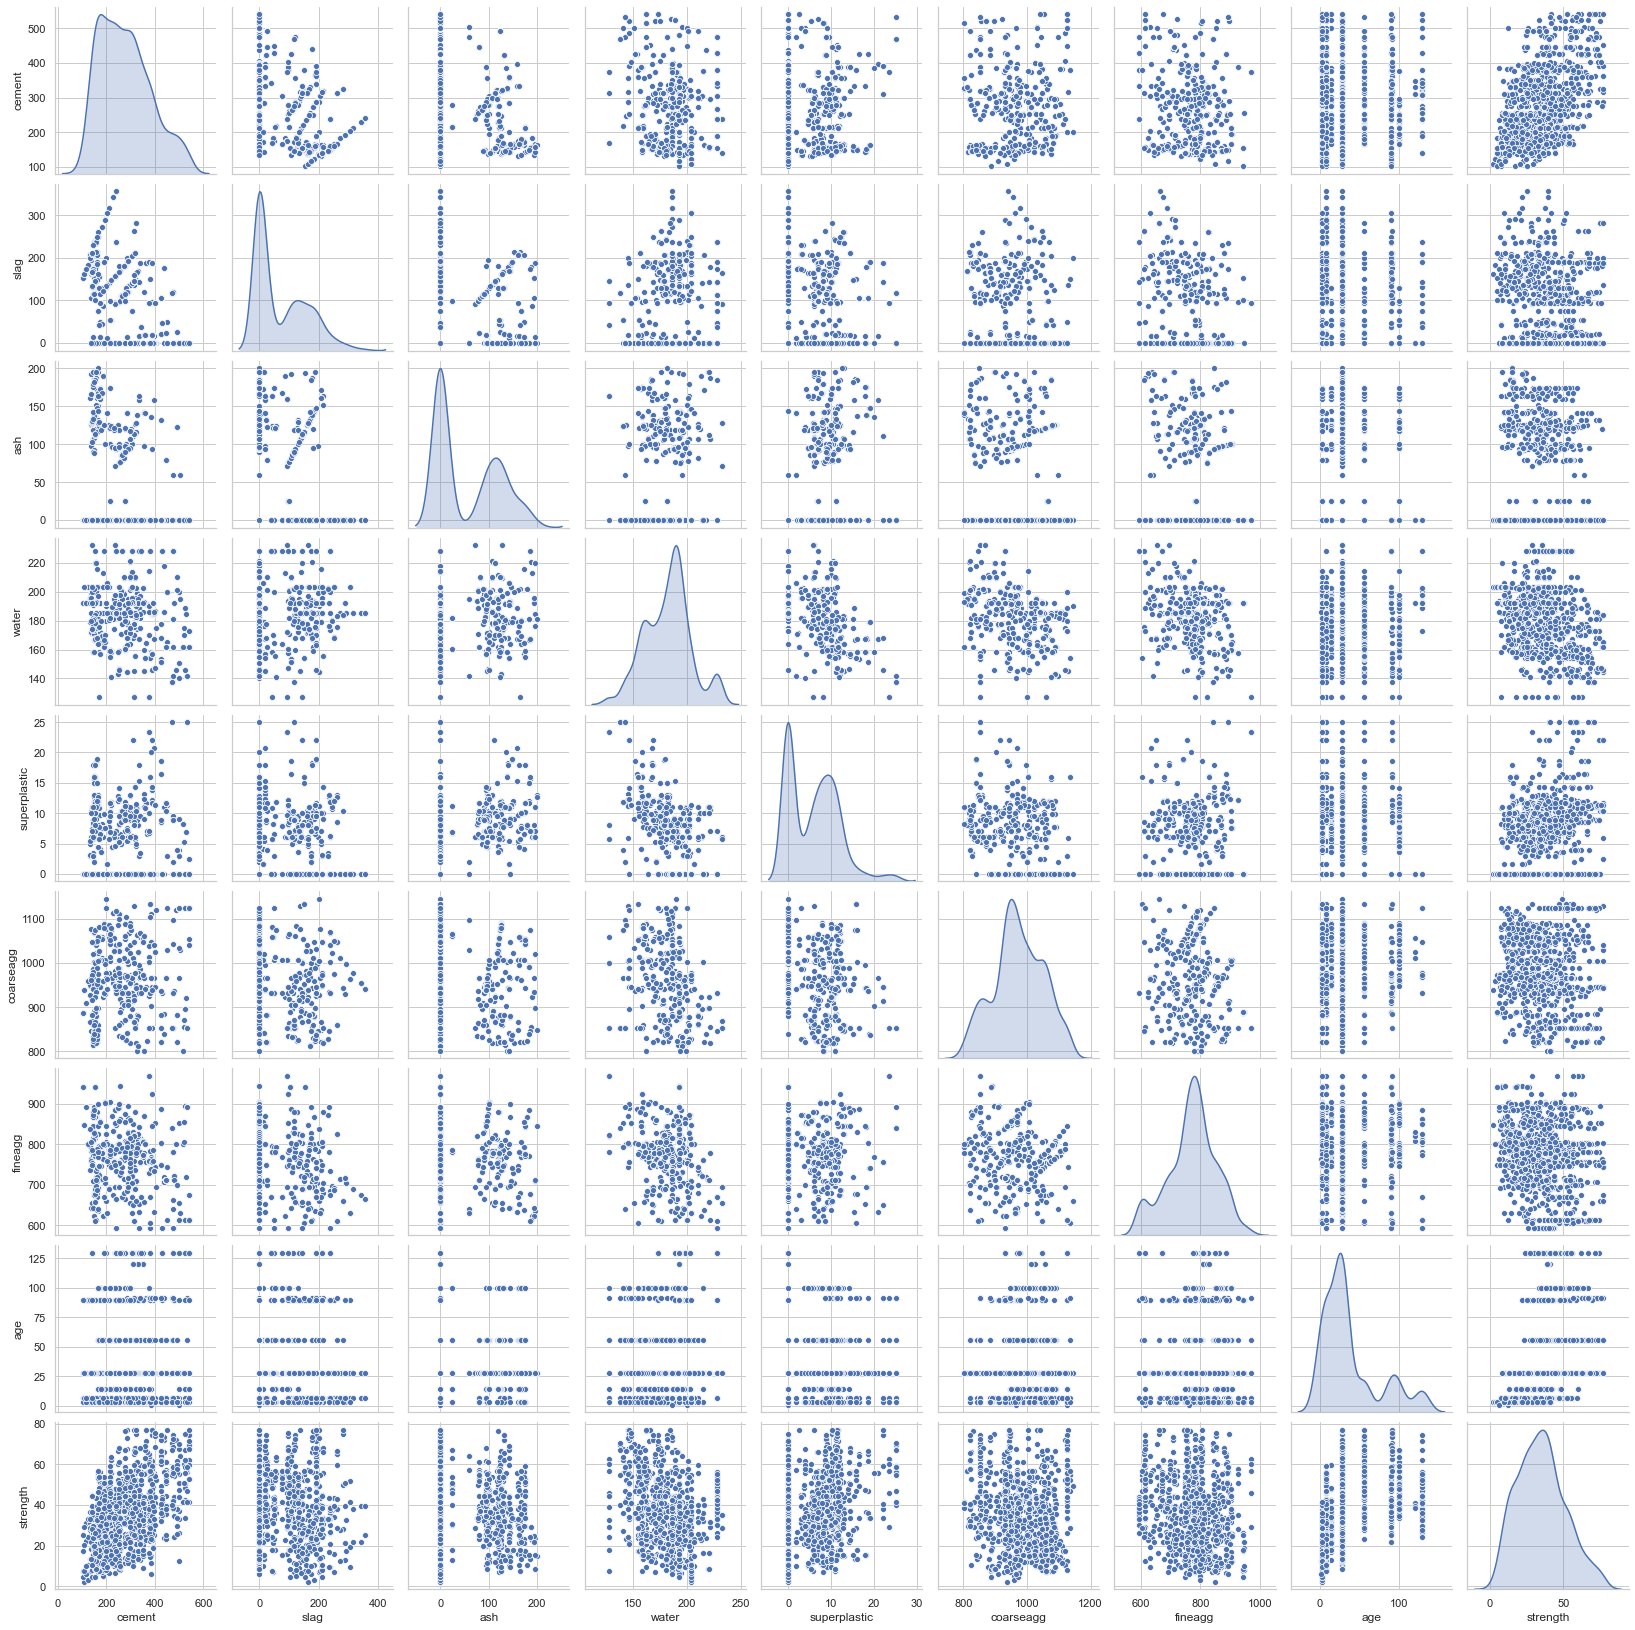

In [13]:
sns.pairplot(mod_df, diag_kind = 'kde')

#### Inferences

1. Strength seems to have some positive correlation with Cement
2. Slag has positive relationship with cement & ash
3. Water & super plastic seem to be negatively correlated
4. Age doesn't have continuous spread

In [14]:
mod_df.groupby('age').size()

age
1.0        2
3.0      129
7.0      122
14.0      62
28.0     419
56.0      86
90.0      54
91.0      17
100.0     52
120.0      3
129.5     59
dtype: int64

#### Turning age into month or other buckets doesn't seem justified

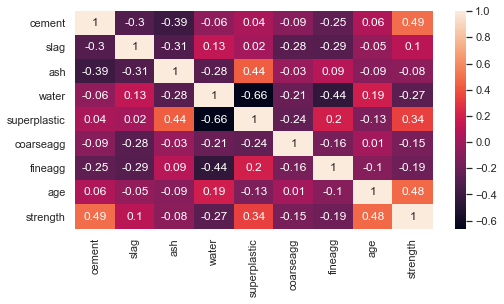

In [15]:
plt.figure(figsize = (8,4))
corr = round(mod_df.corr(),2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)

#### No features are highly correlated to each other

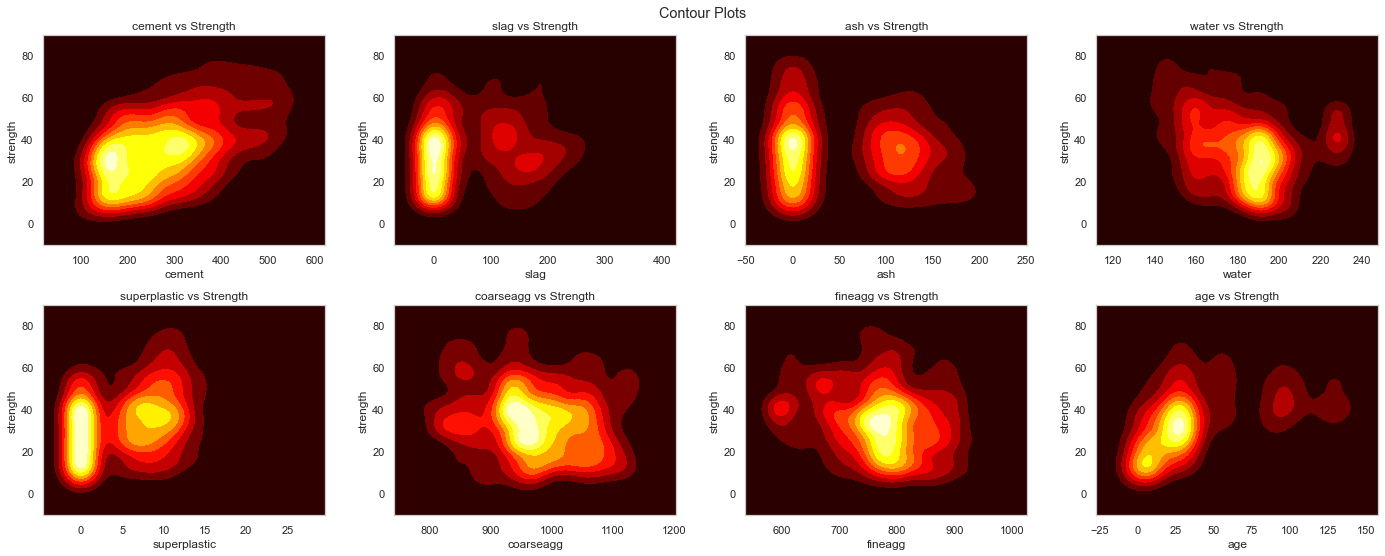

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, gridspec_kw={'width_ratios':[1,1,1,1]}, figsize=(20,8))
fig.suptitle('Contour Plots')
fig.tight_layout(pad=3.0)

k = 0

for i in mod_df.drop('strength', axis = 1).columns:
    r = k//4
    c = k%4
    ax[r,c].set_title(i+" vs Strength", fontsize = 12)
    sns.kdeplot(mod_df[i],mod_df['strength'],cmap = 'hot', shade = True, orient = 'h', ax = ax[r,c])
    k = k+1

#### Inferences

1. Strength increases with amount of cement
2. Strength decreases with amount of water
3. Compressive strength increases with age
4. 0 values in Slag, Ash & Superplastic leads to incorrect representation. Otherwise strength increases with superplastic 
5. Coarseagg & fineagg don't seem to have any relation with strength

In [17]:
# Scaling the data set using Z-Scores

from scipy.stats import zscore

scld_df = mod_df
col = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']

scld_df[col] = scld_df[col].apply(zscore)

scld_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.316792,1.625450,-0.865375,1.013480,-1.045420,-0.033232,-0.300903,-0.281105,29.89
1,-1.052152,-0.346513,1.071486,-1.123827,0.842159,1.372475,0.295376,-0.671679,23.51
2,-0.274530,-0.836600,0.625836,0.252182,-0.084153,-0.225388,1.107915,-0.281105,29.22
3,-0.121115,0.487332,-0.865375,2.171975,-1.045420,-0.546508,-1.282201,-0.281105,45.85
4,-1.187348,1.293305,-0.865375,0.531167,0.545040,0.941736,-0.948435,-0.281105,18.29


### Deliverable -2 (Feature Engineering techniques)

In [18]:
X = scld_df.drop('strength', axis = 1)
y = scld_df['strength']

#### Identify opportunities (if any) to create a composite feature, drop a feature etc.

In [19]:
from itertools import combinations

non_cat_column_list = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age'] 
bi_feat = list(combinations(non_cat_column_list,2))

In [20]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits = 5, shuffle = True, random_state = 2)
bi_feat_dict = {}
LR = LinearRegression()

for i in bi_feat:
    X['i'] = X[i[0]] * X[i[1]]
    scores = cross_val_score(LR, X, y, cv = kfold)
    bi_feat_dict[scores.mean()] = i
    X.drop('i', axis = 1)
    
X.drop('i', axis = 1, inplace = True)

for i in sorted(bi_feat_dict.keys(), reverse = True):
    print(bi_feat_dict[i],round(i,3))

('superplastic', 'age') 0.726
('water', 'coarseagg') 0.725
('water', 'age') 0.724
('water', 'superplastic') 0.723
('ash', 'age') 0.722
('slag', 'age') 0.72
('superplastic', 'coarseagg') 0.719
('cement', 'age') 0.718
('ash', 'superplastic') 0.717
('slag', 'superplastic') 0.717
('coarseagg', 'fineagg') 0.716
('superplastic', 'fineagg') 0.716
('slag', 'coarseagg') 0.716
('cement', 'superplastic') 0.716
('slag', 'fineagg') 0.715
('fineagg', 'age') 0.715
('cement', 'ash') 0.715
('cement', 'coarseagg') 0.715
('water', 'fineagg') 0.715
('cement', 'slag') 0.714
('coarseagg', 'age') 0.714
('slag', 'ash') 0.713
('ash', 'fineagg') 0.713
('slag', 'water') 0.713
('ash', 'water') 0.713
('ash', 'coarseagg') 0.713
('cement', 'fineagg') 0.711
('cement', 'water') 0.71


In [21]:
# Taking the top 3 bivariate feature

X['superplastic_age'] = X['superplastic']*X['age']
X['water_coarseagg'] = X['water']*X['coarseagg']
X['water_age'] = X['water']*X['age']

X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,superplastic_age,water_coarseagg,water_age
0,-1.316792,1.625450,-0.865375,1.013480,-1.045420,-0.033232,-0.300903,-0.281105,0.293873,-0.033680,-0.284894
1,-1.052152,-0.346513,1.071486,-1.123827,0.842159,1.372475,0.295376,-0.671679,-0.565660,-1.542424,0.754850
2,-0.274530,-0.836600,0.625836,0.252182,-0.084153,-0.225388,1.107915,-0.281105,0.023656,-0.056839,-0.070890
3,-0.121115,0.487332,-0.865375,2.171975,-1.045420,-0.546508,-1.282201,-0.281105,0.293873,-1.187002,-0.610553
4,-1.187348,1.293305,-0.865375,0.531167,0.545040,0.941736,-0.948435,-0.281105,-0.153213,0.500219,-0.149314


#### Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((804, 11), (201, 11), (804,), (201,))

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

poly_feat_dict = {}

for p in range(1,5):
    polynomial_features= PolynomialFeatures(degree=p, interaction_only = True)
    X_train_poly = polynomial_features.fit_transform(X_train)
    LR.fit(X_train_poly,y_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    r2_gap = r2_score(y_train,LR.predict(X_train_poly)) - r2_score(y_test,LR.predict(X_test_poly)) 
    poly_feat_dict[p] = [r2_gap,r2_score(y_test,LR.predict(X_test_poly)),np.sqrt(mean_squared_error(y_test,LR.predict(X_test_poly)))]

poly_feat_dict

{1: [0.001320732210925879, 0.7415835784281686, 8.807997894578113],
 2: [0.014494069512238639, 0.8322780776860088, 7.095974786454247],
 3: [0.18328311372100237, 0.7417367650106019, 8.805386862538185],
 4: [556.5044021278909, -555.5308843615767, 408.75378118931457]}

#### Selecting Degree 2 LR as the R2 Score is higher, RMSE is lower & gap in R2 score between train & test is also low indicating no over fitting

### Deliverable -3 (create the model ) : Obtain feature importance for the individual features and present your findings

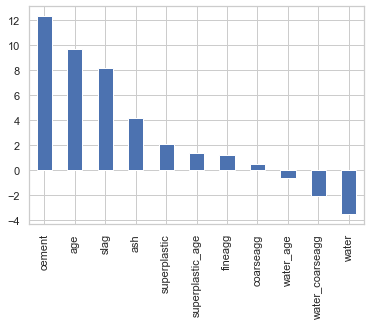

In [24]:
# Feature importance

fi = pd.Series(LR.fit(X,y).coef_, index=X.columns)
fi.nlargest(20).plot(kind='bar')
plt.show()

#### Inferences

1. Important independent features : Cement, Age, Slag, Superplastic & water
2. Important composite features : water_coarseagg

### Deliverable -4 (Tuning the model)

#### Algorithms that you think will be suitable for this project

In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor


polynomial_features= PolynomialFeatures(degree=2, interaction_only = True)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
    
LRP = LinearRegression()
Lasso = Lasso(alpha = 0.2)
Ridge = Ridge(alpha = 0.3)
Dtree = DecisionTreeRegressor(random_state = 0, max_depth = 10)


LRP.fit(X_train_poly,y_train)
Ridge.fit(X_train_poly,y_train)
Lasso.fit(X_train_poly,y_train)
Dtree.fit(X_train_poly,y_train)


LRP_r2_gap = r2_score(y_train,LRP.predict(X_train_poly)) - r2_score(y_test,LRP.predict(X_test_poly))
print(f'Linear : R2 Diff : {LRP_r2_gap}, R2 Score : {r2_score(y_test,LRP.predict(X_test_poly))}, RMSE : {np.sqrt(mean_squared_error(y_test,LRP.predict(X_test_poly)))}, NonZero Coeff : {np.count_nonzero(LRP.coef_)}')

Ridge_r2_gap = r2_score(y_train,Ridge.predict(X_train_poly)) - r2_score(y_test,Ridge.predict(X_test_poly)) 
print(f'Ridge : R2 Diff : {Ridge_r2_gap}, R2 Score : {r2_score(y_test,Ridge.predict(X_test_poly))}, RMSE : {np.sqrt(mean_squared_error(y_test,Ridge.predict(X_test_poly)))}, NonZero Coeff : {np.count_nonzero(Ridge.coef_)}')

Lasso_r2_gap = r2_score(y_train,Lasso.predict(X_train_poly)) - r2_score(y_test,Lasso.predict(X_test_poly)) 
print(f'Lasso : R2 Diff : {Lasso_r2_gap}, R2 Score : {r2_score(y_test,Lasso.predict(X_test_poly))}, RMSE : {np.sqrt(mean_squared_error(y_test,Lasso.predict(X_test_poly)))}, NonZero Coeff : {np.count_nonzero(Lasso.coef_)}')

Dtree_r2_gap = r2_score(y_train,Dtree.predict(X_train_poly)) - r2_score(y_test,Dtree.predict(X_test_poly))
print(f'Dtree : R2 Diff : {Dtree_r2_gap}, R2 Score : {r2_score(y_test,Dtree.predict(X_test_poly))}, RMSE : {np.sqrt(mean_squared_error(y_test,Dtree.predict(X_test_poly)))}, NonZero features : {np.count_nonzero(Dtree.feature_importances_)}')

Linear : R2 Diff : 0.014494069512238639, R2 Score : 0.8322780776860088, RMSE : 7.095974786454247, NonZero Coeff : 67
Ridge : R2 Diff : 0.013666945124939267, R2 Score : 0.8330944340997157, RMSE : 7.0786845283779805, NonZero Coeff : 66
Lasso : R2 Diff : 0.015461779641421813, R2 Score : 0.801486623652263, RMSE : 7.719906421939847, NonZero Coeff : 40
Dtree : R2 Diff : 0.1825289914276006, R2 Score : 0.7933477603109662, RMSE : 7.876571256484987, NonZero features : 65


#### Selecting Lasso Regression as R2 Scores for test & train are similar, R2 Score is quite close to Ridge & Linear Models & the considered coefficients are lower than the other 2 implying lower computational need & better generalization

### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

In [26]:
lasso_param = {'alpha':(np.linspace(0.01,0.1,10))}

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

gsl = GridSearchCV(linear_model.Lasso(), lasso_param, refit = True, cv = 10)
gsl.fit(X_train_poly, y_train)
print(f'Lasso Best Estimator \n\n {gsl.best_params_,}\n')

r2_score(y_train,gsl.predict(X_train_poly))
gsl_r2_gap = r2_score(y_train,gsl.predict(X_train_poly)) - r2_score(y_test,gsl.predict(X_test_poly))
print(f'Lasso : R2 Diff : {gsl_r2_gap}, R2 Score : {r2_score(y_test,gsl.predict(X_test_poly))}, RMSE : {np.sqrt(mean_squared_error(y_test,gsl.predict(X_test_poly)))}')

Lasso Best Estimator 

 ({'alpha': 0.04000000000000001},)

Lasso : R2 Diff : 0.012555793660026793, R2 Score : 0.8294976544170481, RMSE : 7.15455006339894


#### R2 Score has improved with Alpha of 0.04

### Model performance range at 95% confidence level

In [27]:
from sklearn.linear_model import Lasso

X_poly = polynomial_features.fit_transform(X)
stats = list()

lasso = Lasso(alpha = 0.04)

for i in range(1000):
    XB_train, XB_test, yb_train, yb_test = train_test_split(X_poly, y, test_size = 0.5, random_state = i)
    lasso.fit(XB_train,yb_train)
    stats.append(r2_score(yb_test,lasso.predict(XB_test)))

95% confidence interval 74.97% to 82.92%


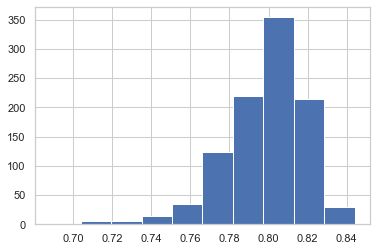

In [28]:
plt.hist(stats)
    
lower = max(0.0, np.percentile(stats, 2.5))  
upper = min(1.0, np.percentile(stats, 97.5))
print(f'95% confidence interval {round(lower*100,2)}% to {round(upper*100,2)}%')